In [1]:
import imageio
import numpy as np
from itertools import product

In [2]:
# import gif
gif_reader = imageio.get_reader('./Samples/3.gif')

In [3]:
# gif to array
gif = np.array([i for i in gif_reader])

In [4]:
gif.shape

(60, 225, 400, 4)

In [5]:
# pixel to negative
def simple_negative_transformer(pixel):
    r,g,b,m = pixel
    return np.array([m-r,m-g,m-b,m])

In [6]:
# iterate pixels
def gif_negative_transformer(gif,f1,f2,y1,y2,x1,x2):
    output = np.copy(gif)
    trans_range = product(range(f1,f2),range(y1,y2),range(x1,x2))
    for i in trans_range:
        output[i] = simple_negative_transformer(gif[i])
    return output

In [7]:
# test transform range
f,y,x,c = gif.shape
f1 = int(f/4)
f2 = int(f*3/4)
y1 = int(y/4)
y2 = int(y*3/4)
x1 = int(x/4)
x2 = int(x*3/4)

In [8]:
gif_trans = gif_negative_transformer(gif,f1,f2,y1,y2,x1,x2)

In [9]:
from matplotlib import image
from matplotlib import pyplot as plt

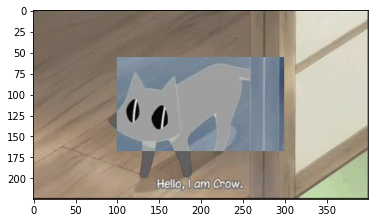

In [10]:
plt.imshow(gif_trans[21])
plt.show()

In [11]:
# output each frame as jpg
# https://stackoverflow.com/questions/11837979/removing-white-space-around-a-saved-image-in-matplotlib
def jpg_output(gif):
    f,y,x,c = gif.shape
    for i in range(f):
        plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
        plt.margins(0,0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(gif[i])
        plt.savefig('./frames/frame_{}.jpg'.format(i), bbox_inches = 'tight', pad_inches = 0)

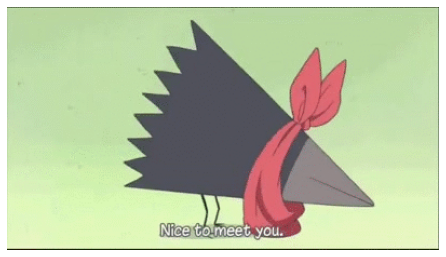

In [12]:
jpg_output(gif_trans)

In [13]:
# imageio doc: https://imageio.readthedocs.io/en/stable/examples.html
# combine jpgs to gif
def output_gif(frames_path, gif_path, f):
    with imageio.get_writer(gif_path, mode='I') as writer:
        for i in range(f):
            writer.append_data(imageio.imread(frames_path.format(i=i)))

In [14]:
gif_path = "./outputs/3_test.gif"
frames_path = "./frames/frame_{i}.jpg"

output_gif(frames_path,gif_path,f)